# Aula 2 - Zero de Funções

Zero de Funções, ou raiz de funções, é o termo que se utiliza para a técnica para justamente encontrar o valor que uma função qualquer cruza o eixo. Embora seja uma disciplina que ocorre em diversos contextos, talvez nos projetos de engenharia seja onde a técnica mais se sobressai. Na tabela abaixo temos alguns exemplos onde essa técnica pode ser empregada:

| Princípio Fundamental | Variável Dependente                          | Variável Independente | Parâmetros                                                         |
|-----------------------|----------------------------------------------|-----------------------|--------------------------------------------------------------------|
| Balanço de Calor      | Temperatura                                  | Tempo e Posição       | Propriedades térmicas dos materiais.                               |
| Balanço de Massa      | Concentração ou Quantidade de Massa          | Tempo e Posição       | Transferências de massa, transporte de poluentes.                  |
| Balanço de Forças     | Magnitude e Direção das Forças               | Tempo e Posição       | Resistência dos materiais, propriedades estruturais                |
| Segunda lei de Newton | Aceleração, Velocidade ou Localização        | Tempo e Posição       | Massa de materiais, sistemas geometricos, parametros dissipativos. |
| Lei de Kirchhoff      | Correntes e Voltagens de Circuitos Elétricos | Tempo                 | Propriedades elétricas                                             |

Dentre as técnicas de cálculo do zero de funções, estudaremos as seguintes nessa aula:
- Método da Bissecção
- Método de Newton-Raphson

## Método da Bissecção

O método da bissecção é um método para resolver equações do tipo $f(x)=0$. Este consiste em aplicar sucessivas iterações para reduzir o intervalo em que o zero se encontra pela metade em cada iteração, processo também conhecido como busca incremental. Este método não é o mais rápido em termos computacionais, entretanto é um dos mais confiáveis.

![Bissecção](img/bisseccao.png "Representação do Método da Bissecção. BURDEN R. L. et al. Numerical Analysis. 9 ed. Brooks/Cole Cengage Learning, 2010. p. 49.")

Representação do Método da Bissecção. BURDEN R. L. et al. Numerical Analysis. 9 ed. Brooks/Cole Cengage Learning, 2010. p. 49.

Em termos simples, dentro e um intervalo entre $x_2$ (limite superior) e $x_1$ (limite inferior) haverá uma raiz caso $f(x_1)$ e $f(x_2)$ tiverem sinais contrários. Para reduzir o intervalo para metade calculamos uma terceira posição $f(x_3) = \frac{1}{2}\left( x_1 + x_2\right)$ que será o meio do intervalo. Neste ponto avaliamos qual os dois lados possuem sinais contrários $f(x_1)$ e $f(x_3)$ ou $f(x_3)$ e $f(x_2)$, no qual $f(x_3)$ substitui um dos extremos iniciais, diminuindo pela metade o intervalo da função. O critério de parada deste método é o seguinte

$\left|x_n - x_(n-1)\right| \leq \epsilon$

onde n é a enésima iteração e $\epsilon$ é o erro tolerado.

Se o intervalo inicial for $\Delta x$ e após a primeira iteração ele se transforma em $\Delta x/ 2$, a segunda seria $\Delta x / 2^2$. Após a enésima iteração temos que o intervalo será $\Delta x/ 2^n$, se consideramos que $\Delta x/ 2^n = \epsilon$, podemos estimar a quantidade de iterações necessárias utilizando:

$n = \frac{ln\left(\Delta x / \epsilon\right)}{ln 2}$

Em python o processo de implementação é o seguinte:
1. Importar as Bibliotecas Necessárias
2. Definir a Função Erro
3. Definir a Função da Bissecção
4. Definir a Equação a Ser Calculada

### Bibliotecas Necessárias

In [1]:
import sys # Biblioteca para operações de sistema e console
import math #Biblioteca para funções matemáticas básicas
import numpy as np #Biblioteca Numpy

### Função de Erro
Esta função é necessária para o caso em que o intervalo que fornecemos como condição inicial não contenha raiz alguma. Em outras palavras, quando $f(x_1)$, $f(x_2)$ e $f(x_3)$ têm o mesmo sinal.

In [2]:
def erro(msg): # Função erro com argumento msg (Mensagem)
    sys.exit(msg)

### Função da Bissecção

In [3]:
def bisseccao(func, x1, x2, tol):
    '''
    Utilização:
    raiz = bisseccao(func, x1, x2, tol)
     
    func - função a ser calculada
    x1 - primeiro ponto do intervalo
    x2 - segundo ponto do intervalo
    tol - erro tolerado
    
    Encontra a raiz de uma função f(x) = 0 utilizando o método da bisseção.
    A raiz deve estar entre as posições iniciais x1 e x2.
    '''
    # Cálculo das posições f(x1) e f(x2)
    f1 = func(x1)
    if f1 == 0: return x1
    f2 = func(x2)
    if f2 == 0: return x2
      
    # Cálculo do Número de Iterações
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
        ## math.ceil - Faz o arredondamento para cima (e.g. 1.2 --> 2.0)
        ## math.log - Faz o cálculo do logaritmo natural (ln)
        ## abs - É uma função nativa de python que calcula o valor absoluto, ou módulo.
    
    print(f"Número de Iterações: {n}")
    print("Iteração |   x         |   Erro")
    
    # Definição do Loop da Bissecção
    x_ant = 0
    err = abs(f2 - f1)*10
    iteracao = 0
    while err > tol:
        x = 0.5*(x1 + x2)
        fx = func(x)
        
        if fx == 0: return x
        elif np.sign(f2) != np.sign(fx):
            x1 = x
            f1 = fx
        elif np.sign(f1) != np.sign(fx):
            x2 = x
            f2 = fx
        else:
            erro("O intervalo não contém qualquer raiz")
        
        if iteracao != 0:
            err = abs(x - x_ant)
            ## Isto impede que essa linha seja executada antes da segunda iteração.
            ## O que faria com que o código parasse de funcionar sem executar o método
        x_ant = x
        iteracao += 1 # iteracao = iteracao + 1
        print("%d        |"%iteracao,"x = %.4f"%x, "| Erro = %.4f"%err)  
    return x

### Definição da Equação a Ser Calculada

Como exemplo inicial utilizaremos a seguinte equação:

$f(x) = x^3 - 7x^2 + 4$

In [4]:
def func(x):
    return x**3 - 7*x**2 + 4

Como medida comparativa, vamos fazer o plot da função

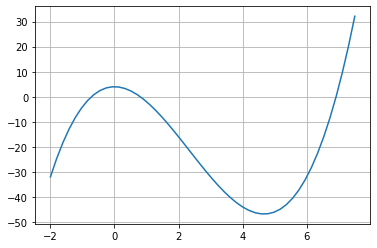

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x_val = np.linspace(-2,7.5) # Cria uma lista de pontos igualmente espaçados

plt.plot(x_val, func(x_val))
plt.grid()
plt.show()

Sabemos agora, que temos raizes nos intervalos (-2 a 0), (0 a 2) e (6 e 7.5)
### Cálculo da Raiz
Calculemos então a primeira raiz utilizando o método da bissecção:

In [6]:
tol = 1.0e-04
x1 = -2
x2 = 0
raiz = bisseccao(func, x1, x2, tol)

# Imprime o resultado da bissecção
print(f"x = {raiz}")

Número de Iterações: 15
Iteração |   x         |   Erro
1        | x = -1.0000 | Erro = 1.0000
2        | x = -0.5000 | Erro = 0.5000
3        | x = -0.7500 | Erro = 0.2500
4        | x = -0.6250 | Erro = 0.1250
5        | x = -0.6875 | Erro = 0.0625
6        | x = -0.7188 | Erro = 0.0312
7        | x = -0.7344 | Erro = 0.0156
8        | x = -0.7266 | Erro = 0.0078
9        | x = -0.7227 | Erro = 0.0039
10        | x = -0.7207 | Erro = 0.0020
11        | x = -0.7197 | Erro = 0.0010
12        | x = -0.7202 | Erro = 0.0005
13        | x = -0.7200 | Erro = 0.0002
14        | x = -0.7198 | Erro = 0.0001
15        | x = -0.7198 | Erro = 0.0001
x = -0.71978759765625


## Exercício

Escreva a funcao de bissecção utilizando o método de loop for ao invés do while que usamos. Para isso será necessário utilizar a construção que calcula a quantidade de loops necessários para delimitar o loop for. Aqui vai um início:

```python
import math
import numpy as np
import sys

def erro(msg): # Função erro com argumento msg (Mensagem)
    sys.exit(msg)

def bisseccao(func, x1, x2, tol):
    '''
    Utilização:
    raiz = bisseccao(func, x1, x2, tol)
    
    f - função a ser calculada
    x1 - primeiro ponto do intervalo
    x2 - segundo ponto do intervalo
    tol - erro tolerado
    
    Encontra a raiz de uma função f(x) = 0 utilizando o método da bisseção.
    A raiz deve estar entre as posições iniciais x1 e x2.
    '''
    # Cálculo das posições f(x1) e f(x2)
    f1 = func(x1)
    if f1 == 0: return x1
    f2 = func(x2)
    if f2 == 0: return x2
      
    # Cálculo do Número de Iterações
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
        ## math.ceil - Faz o arredondamento para cima (e.g. 1.2 --> 2.0)
        ## math.log - Faz o cálculo do logaritmo natural (ln)
        ## abs - É uma função nativa de python que calcula o valor absoluto, ou módulo.
    for ii in range(n+1):
        SEU CÓDIGO AQUI
    return x

def func(x):
    return x**3 - 7*x**2 + 4

tol = 1.0e-04
x1 = -2
x2 = 0
raiz = bisseccao(func, x1, x2, tol)

# Imprime o resultado da bissecção
print(f"x = {raiz}")
```

## Método de Newton-Raphson

Talvez o método mais utilizado para localizar raizes, por ser simples e rápido. Este método utiliza o conceito de retas tangentes para procurar a raiz. Sua equação pode ser derivada através de interpretação geométrica ou baseado na série de Taylor. Sua equação principal é a seguinte:

$x_{i+1}=x_i-\frac{f(x_i)}{f^{'}(x_i)}$

![Newton-Raphson](img/newton-raphson.png "Interpretação Gráfica do Método")

Interpretação Gráfica do Método. Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge: Cambridge University Press.

O método consiste em repetidamente aplicar a equação acima até que o critério de convergencia (erro tolerado) seja atingido. Sendo que o erro é definido como:

$\epsilon =\left| x_{i+1} - x_i\right |$

O método de Newton-Raphson tem uma convergencia quadrática, ou seja o erro atual é o quadrado do erro da iteração anterior. O que significantemente diminui a quantidade de iterações. Entretanto, este método nem sempre chega a convergir, já que nem sempre a reta tangente é uma aproximação aceitável da função. Neste caso podemos recorrer ao método da bissecção.

![Divergência de Newton-Raphson](img/newton-raphson-diverge.png "Casos em que a reta tangente não é uma boa aproximação")

Casos em que a reta tangente não é uma boa aproximação. Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge: Cambridge University Press.

Vamos implementar a método:

In [7]:
def newtonRaphson(f, df, x0, tol):
    """
    Utilização:
    x = newtonRaphson(f, df, x0, tol)
    
    f - função a ser calculada
    df - derivada desta função
    x0 - ponto inicial
    tol - erro tolerado
    
    Calcula a raiz de uma função (F(x) = 0) calculando o método de Newton-Raphson.
    O usuário deve fornecer a função f(x) e sua derivada f'(x)
    """
    err = 100
    iteracao = 0
    x_ant = x0
    err_ant = err*10
    while err > tol:
        x = x_ant - f(x_ant)/df(x_ant)
        err = abs(x-x_ant)
        if err > err_ant:
            erro("O método divergiu")
        x_ant = x
        err_ant = err
        iteracao += 1
        print("%d        |"%iteracao,"x = %.4f"%x, "| Erro = %.4f"%err)
    return x

Vamos agora definir a função a ser calculada. Note que aqui vamos usar uma notação um pouco diferente da anterior, mas ambas possuem o mesmo significado. Funções que apenas retornam valores, exemplo:

```python
def função(x):
    return x + 2**x
```
Podem ser declaradas apenas usando uma linha na forma:

```python
função = lambda x: x + 2**x
```

Ambas têm o mesmo significado, a escolha fica a cargo de quem escreve o código.

Vamos usar como teste um problema simples, encontrar o valor da raiz quadrada de 2. Desta forma, nossa equação será a segunte:

$f(x) = x^2 - 2$

$f^{'}(x) = 2x$

In [8]:
f = lambda x: x**2 - 2
df = lambda x: 2*x

Com todas as funções declaradas, basta apenas chamá-las para que tenhamos o nosso resultado.

In [9]:
# Note que os parametros x0 e tol foram colocados diretamente na chamada da função.
# Isto faz com que economizemos algumas linhas, entretanto tem o mesmo significado que:
# x0 = 2
# tol = 1e-4
# raiz = newtonRaphson(f, df, x0, tol)
raiz = newtonRaphson(f, df, 2, 1e-4)

print(f"x = {raiz}")

1        | x = 1.5000 | Erro = 0.5000
2        | x = 1.4167 | Erro = 0.0833
3        | x = 1.4142 | Erro = 0.0025
4        | x = 1.4142 | Erro = 0.0000
x = 1.4142135623746899


Podemos conferir o resultado de forma gráfica:

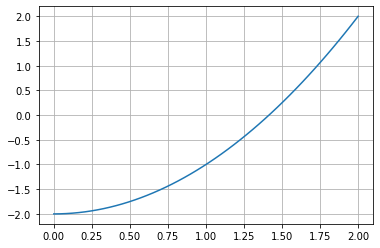

In [10]:
%matplotlib inline

x_val = np.linspace(0,2) # Cria uma lista de pontos igualmente espaçados

plt.plot(x_val, f(x_val), label="f(x)")
plt.grid()
plt.show()

## Exercício

![Exercicio Bernoulli](img/bernouli.png)

A equação de Bernoulli para o escoamento de canal aberto com um pequeno obstáculo é a seguinte:

$\frac{Q^2}{2gb^2h^{2}_{0}}+h_0=\frac{Q^2}{2gb^2h^{2}}+h+H$

onde

| Símbolo | Valor      | Descrição                          |
|---------|------------|------------------------------------|
| $Q$     | 1.2 m³/s   | Vazão do Escoamento                |
| $g$     | 9.81 m/s²  | Aceleração Gravitacional           |
| $b$     | 1.8 m      | Largura do Canal                   |
| $h_0$   | 0.6 m      | Altura da Lamina D'Água à Montante |
| $H$     | 0.075 m    | Altura do Degrau                   |
| $h$     | -          | Lamina D'Água Acima do Degrau      |

Determine o valor de h